<a href="https://colab.research.google.com/github/SpartanWK/rotavirus/blob/main/RotaVirus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
import warnings
from sklearn.svm import SVC
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
pd.plotting.register_matplotlib_converters()
%matplotlib inline
import seaborn as sns

In [ ]:
df18 = pd.read_csv('/content/RotaVirus2018.csv')
df19 = pd.read_csv('/content/RotaVirus2019.csv')

In [ ]:
def assess_NA(data):
    """
    Returns a pandas dataframe denoting the total number of NA values and the percentage of NA values in each column.
    The column names are noted on the index.
    
    Parameters
    ----------
    data: dataframe
    """
    # pandas series denoting features and the sum of their null values
    null_sum = data.isnull().sum()# instantiate columns for missing data
    total = null_sum.sort_values(ascending=False)
    percent = ( ((null_sum / len(data.index))*100).round(2) ).sort_values(ascending=False)
    
    # concatenate along the columns to create the complete dataframe
    df_NA = pd.concat([total, percent], axis=1, keys=['Number of NA', 'Percent NA'])
    
    # drop rows that don't have any missing data; omit if you want to keep all rows
    df_NA = df_NA[ (df_NA.T != 0).any() ]
    
    return df_NA

In [ ]:
df_NA = assess_NA(df18)
df_NA

,Number of NA,Percent NA
VILLAGE,11,4.04
BMI,7,2.57
NEW DIAGNOSIS,5,1.84
NEXT OF KIN,1,0.37
WEIGHT,1,0.37


In [ ]:
df_NA = assess_NA(df19)
df_NA

,Number of NA,Percent NA
VILLAGE,39,3.73
BMI,28,2.68
NEW DIAGNOSIS,18,1.72
WEIGHT,1,0.10


In [ ]:
df18.dropna(axis=0)

,PERSON ID,NAME OF PATIENT,VILLAGE,AGE,SEX,WEIGHT,BMI,NEXT OF KIN,NEW DIAGNOSIS
0,10037496,AHEREZA VANESSA,ANDREWS,6 months,F,6.9,16.3,NAHWERA JUDITH,RVI
1,10037637,AIJUKA CHRISPUS,RUFUNJO,9 years,M,29.0,14.4,ARINAITWE PRIMA,RVI
2,10022156,AKORAGYE NATASHA,BUBAREBWERA,2 years,F,11.0,16.4,AMPUMUZA PERUTH,Bacterial upper respiratory tract infection
3,10036924,AKORAGYE MIRACLE,NYAMITWOBORA,13 years,M,35.0,13.3,TUMWEBAZE HARRIET,Gastro-Intestinal Disorders (non-Infective)
4,10037042,AKORAGYE IVAN,ANDREWS,7 months,M,10.0,16.0,NUWAMANYA SHALON,RVI
...,...,...,...,...,...,...,...,...,...
264,10036433,ASINGWIRE JOPHIEL KYEREREZI,KAKYEKA,5 months,M,6.0,17.2,ATUHAMYA PATIENCE,Iron deficiency Anemia
265,10000892,Ataho Cathbert Akibaho,Nkonkonjeru,3 years,M,16.0,14.8,Ataho Collins,Reactive airway disease (RAD)
267,10036871,ATAMBA LUCAS. EARL.,NSIIKYE,4 months,M,6.4,19.0,NAHABWE PHIONAH,Viral Respiratory Tract Infection (ARI)
268,10037233,ATAMBA JOSHUA,KASHENYI,3 months,M,6.1,17.5,KAKONGI ANNET,VIRAL GASRTRO ENTERITIS


In [ ]:
df19.dropna(axis=0)

,PERSON ID,NAME OF PATIENT,VILLAGE,AGE,SEX,WEIGHT,BMI,NEXT OF KIN,NEW DIAGNOSIS
0,10035606,NABUNYA ARIANA,LUGAZI,3 months,f,7.0,16.6,NAKANJAKO AISHA,Allergic conjunctivitis
1,10017292,ABAHO MICHEAL,ALLIANCE,2 years,m,11.0,13.3,KYARIKUNDA PAMELLAH,Viral Respiratory Tract Infection (ARI)
2,10036666,ABDIRAHMAN SAID,NAKIVALE CAMP,2 years,m,18.0,11.3,OMARU ADAM,Allergic rhinitis
3,10024919,AGARUKAMU POLITE,NYAKINOMBE,4 years,m,21.0,15.3,OKWAKUNDA LILIAN,Allergic rhinitis
4,10037403,ARINANYE JOEL,NYAKYERA,12 months,m,8.1,14.0,TWIKYIRIZE DIVION,viral systemic Infection
...,...,...,...,...,...,...,...,...,...
1039,10033465,YEBARE TESTIMONY,KASHUMBA,6 months,m,8.9,25.6,SCOVIA TUMUHIMBISE,Bacterial conjunctivitis
1040,10037415,ZAKARIA GARAAD ABDINASIR,NAKIVALE,13 years,m,28.0,12.0,FATUMA AHMED MUHAMED,Tonsilitis
1041,10036642,ZEESHAM JUMBA,KISURO,1 year,m,10.7,14.8,OSHABA MERON,INFECTIVE GASTRO ENTERITIS
1042,10037795,ZIMWANGUHIZA BURASIO,KIGUMA,2 years,m,14.9,21.1,NAKAHANGUZI,Allergic Dermatitis


In [ ]:
train = pd.read_csv('/content/RotaVirus1.csv')
test = pd.read_csv('/content/RotaVirus2.csv')

In [ ]:
train.dropna()

,Month,Reported Cases,Season,Death Case
0,January,4.0,Dry,0.0
1,February,5.0,Dry,0.0
2,March,10.0,Wet,1.0
3,April,8.0,Wet,0.0
4,May,16.0,Wet,0.0
5,June,6.0,Dry,1.0
6,July,4.0,Dry,2.0
7,August,6.0,Dry,0.0
8,September,9.0,Wet,0.0
9,October,13.0,Wet,1.0


In [ ]:
test.dropna()

,Month,Reported Cases,Season,Death Cases
0,January,8.0,Dry,0.0
1,February,7.0,Dry,0.0
2,March,15.0,Wet,0.0
3,April,11.0,Wet,2.0
4,May,17.0,Wet,1.0
5,June,7.0,Dry,0.0
6,July,8.0,Dry,0.0
7,August,8.0,Dry,1.0
8,September,13.0,Wet,0.0
9,October,15.0,Wet,2.0


Text(0, 0.5, 'Death Cases')

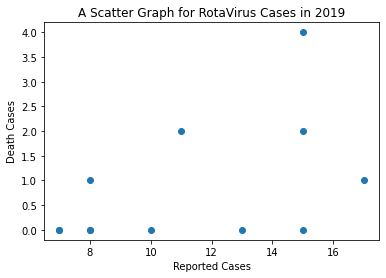

In [ ]:
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(test['Reported Cases'], test['Death Cases'])
# set a title and labels
ax.set_title('A Scatter Graph for RotaVirus Cases in 2019')
ax.set_xlabel('Reported Cases')
ax.set_ylabel('Death Cases')

Text(0, 0.5, 'Death Cases')

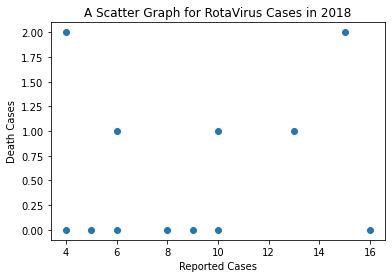

In [ ]:
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(train['Reported Cases'], train['Death Case'])
# set a title and labels
ax.set_title('A Scatter Graph for RotaVirus Cases in 2018')
ax.set_xlabel('Reported Cases')
ax.set_ylabel('Death Cases')

Text(0, 0.5, 'Months')

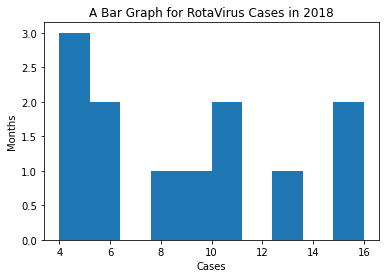

In [ ]:
fig, ax = plt.subplots()
# plot histogram
ax.hist(train['Reported Cases'])
# set title and labels
ax.set_title('A Bar Graph for RotaVirus Cases in 2018')
ax.set_xlabel('Cases')
ax.set_ylabel('Months')

sns.countplot(x='season',data=data)

Text(0.5, 1.0, 'count of cases per season')

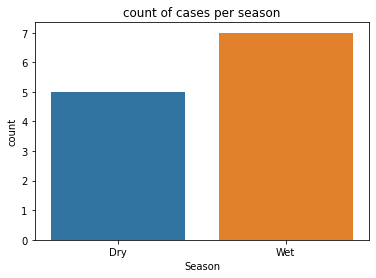

In [ ]:
sns.countplot(x='Season',data=train)
plt.title('count of cases per season')

In [ ]:
#statistics of reported cases 
st=train['Reported Cases'].describe()
st

count    12.000000
mean      8.833333
std       4.130449
min       4.000000
25%       5.750000
50%       8.500000
75%      10.750000
max      16.000000
Name: Reported Cases, dtype: float64

In [ ]:
#statistics of death cases 
st=train['Death Case'].describe()
st

count    12.000000
mean      0.583333
std       0.792961
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       2.000000
Name: Death Case, dtype: float64

Text(0.5, 1.0, 'violin plot of death cases against reported cases')

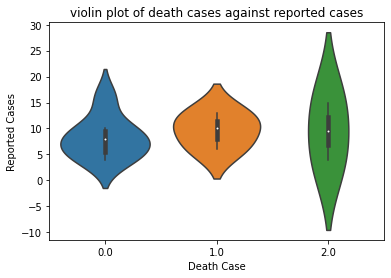

In [ ]:
#violin plots death cases against reported cases
#plt.subplot(2,4,4)
sns.violinplot(y= 'Reported Cases', x='Death Case', data = train)
plt.title('violin plot of death cases against reported cases')

Text(0.5, 1.0, 'data correllations of 2018 data')

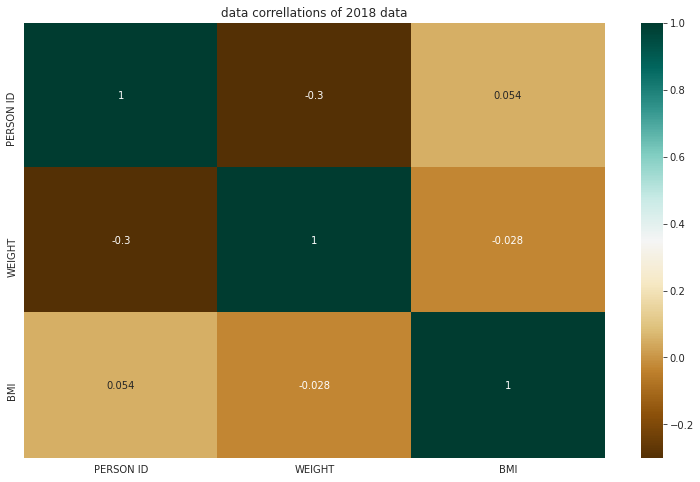

In [ ]:
#heatmap of data correllations
plt.figure(figsize=(13,8))
c=df18.corr()
sns.set_style("whitegrid");
sns.heatmap(c,cmap='BrBG',annot=True)
plt.title('data correllations of 2018 data')

Text(0.5, 1.0, 'data correllations of 2019 data')

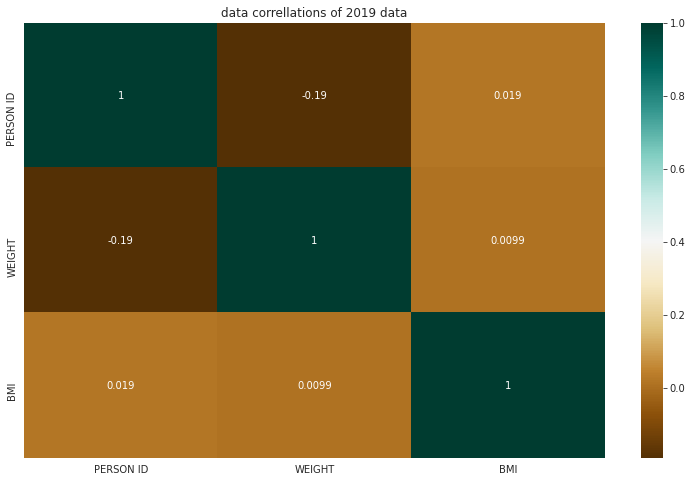

In [ ]:
#heatmap of data correllations
plt.figure(figsize=(13,8))
c=df19.corr()
sns.set_style("whitegrid");
sns.heatmap(c,cmap='BrBG',annot=True)
plt.title('data correllations of 2019 data')

Text(0.5, 1.0, 'distribution of reported cases')

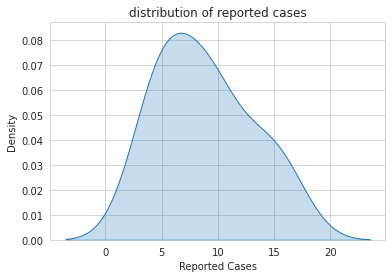

In [ ]:
#kde plot  for reported cases
x=train['Reported Cases']
sns.kdeplot(x, shade=True)
plt.title('distribution of reported cases')


Text(0.5, 1.0, 'distribution of death cases')

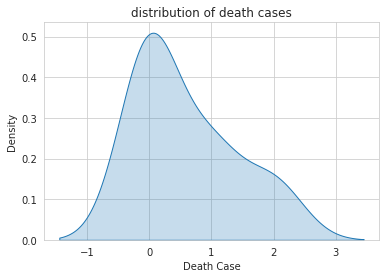

In [ ]:
#kde plot  for reported cases
x=train['Death Case']
sns.kdeplot(x, shade=True)
plt.title('distribution of death cases')


Text(0.5, 1.0, 'count of cases males and females who are infected in 2018')

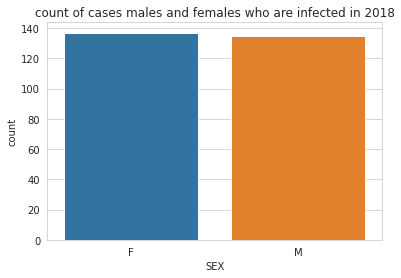

In [ ]:
sns.countplot(x='SEX',data=df18)
plt.title('count of cases males and females who are infected in 2018')

Text(0.5, 1.0, 'count of cases males and females who are infected in 2019')

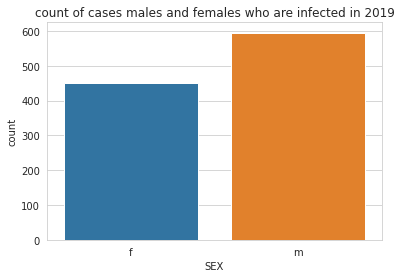

In [ ]:
sns.countplot(x='SEX',data=df19)
plt.title('count of cases males and females who are infected in 2019')

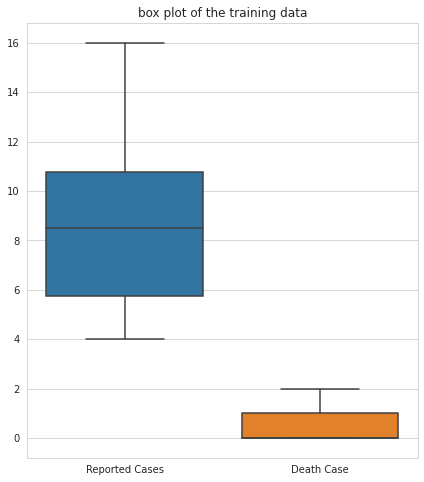

In [ ]:
#boxplot of the training data
plt.figure(figsize=(7,8))
sns.boxplot(data=train)
plt.title('box plot of the training data')
plt.show()


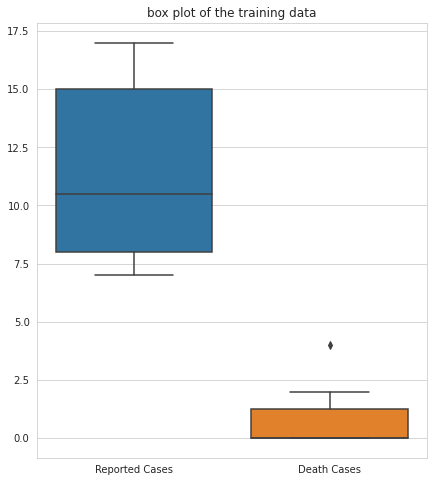

In [ ]:
#boxplot of the testing  data
plt.figure(figsize=(7,8))
sns.boxplot(data=test)
plt.title('box plot of the training data')
plt.show()


In [ ]:
#converting the season values to enable training
#let 0 stand for dry
#and 1 stand for wet
train['Season']=np.where(train['Season']=='Dry',0,1)
train

,Month,Reported Cases,Season,Death Case
0,January,4.0,0,0.0
1,February,5.0,0,0.0
2,March,10.0,1,1.0
3,April,8.0,1,0.0
4,May,16.0,1,0.0
5,June,6.0,0,1.0
6,July,4.0,0,2.0
7,August,6.0,0,0.0
8,September,9.0,1,0.0
9,October,13.0,1,1.0


In [ ]:
 train= train.dropna()

In [ ]:
feat=['Reported Cases','Season']
X=train[feat].values
y=train['Death Case'].values

In [ ]:
# splitting the dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=1) #70% training set and 30% test

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8, 2)
(4, 2)
(8,)
(4,)


### MODEL TRAINING

In [ ]:


#using the linear regression algorithm
clf = LinearRegression(normalize=True)
#fitting the model
clf.fit(X_train,y_train)
#making the prediction
y_pred = clf.predict(X_test)

print(r2_score(y_test,y_pred))

-4.032295271049601


In [ ]:
# Random forest Rclassifier
rf =RandomForestClassifier(n_estimators=100,oob_score=True,random_state=123)
rf.fit(X_train,y_train)
pred=rf.predict(X_test)
accuracy=accuracy_score(y_test,pred)
print(accuracy)

0.5


In [ ]:
#KNeighborsClassifier
kn =KNeighborsClassifier(n_neighbors=4,metric='euclidean')
kn.fit(X_train,y_train)

y_pred =kn.predict(X_test)
accuracy=accuracy_score(y_test,pred)
print(accuracy)

0.5


### Using Support Vector machine 

In [ ]:
svm = SVC(kernel='rbf',random_state=0)
svm.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svm.score(X_test,y_test)

0.5

### Applying standard scaler 

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
svm = SVC(kernel='rbf',random_state=0,probability=True) #probability for predict_proba
svm.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svm.score(X_test,y_test)

0.5

### Applying hyper parameter tuning to improve the model accuracy

In [ ]:
param_grid = {'C':[1,10,100,200],
              'kernel':['rbf','poly','linear','sigmoid'],
              'degree':[1,2,4,6],
              'gamma':[0.01,0.1,0.5,1]}

grid=GridSearchCV(SVC(), param_grid=param_grid, cv=4)
grid.fit(X_train,y_train)

y_pred = grid.predict(X_test)

print("Accuracy: {}".format(grid.score(X_test, y_test)))
print("Tuned Model Parameters: {}".format(grid.best_params_))

Accuracy: 0.5
Tuned Model Parameters: {'C': 1, 'degree': 4, 'gamma': 1, 'kernel': 'poly'}


### Confusion matrix

In [ ]:
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_pred,y_test)
print('Confusion Matrix \n',cm)

Confusion Matrix 
 [[2 1 0]
 [0 0 0]
 [1 0 0]]


 False Positive 2
- False Negative 1
- True Negative 1
- True Positive 0


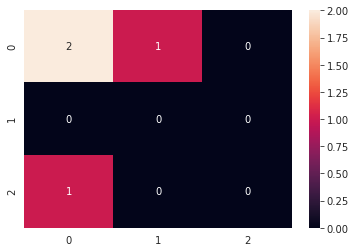

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

### classification report

In [ ]:
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import classification_report

In [ ]:
cr = classification_report(y_pred,y_test)
print('Classification Report\n',cr)

Classification Report
               precision    recall  f1-score   support

         0.0       0.67      0.67      0.67         3
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         1

    accuracy                           0.50         4
   macro avg       0.22      0.22      0.22         4
weighted avg       0.50      0.50      0.50         4



### Roc Curve

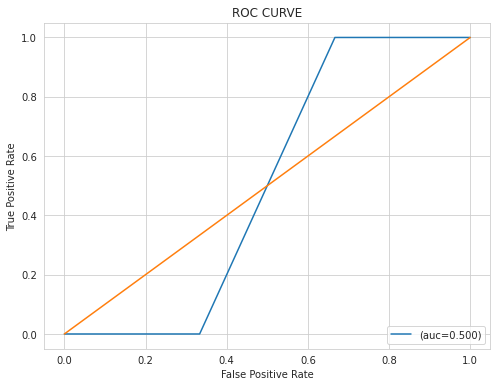

In [ ]:
y_prob = svm.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test,y_prob)
Auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr,linestyle='-',label='(auc=%0.3f)' %Auc)
plt.plot([0,1],[0,1])
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

### Model complexity

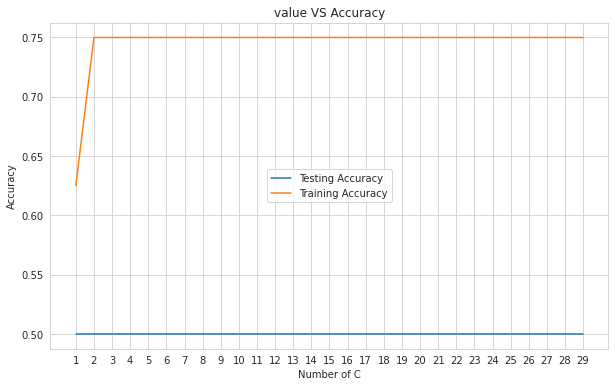

Best accuracy is 0.5 with C = 1


In [ ]:
num = np.arange(1, 30)
train_accuracy = []
test_accuracy = []
for i, k in enumerate(num):
    svm = SVC(C=k)
    svm.fit(X_train,y_train)
    train_accuracy.append(svm.score(X_train, y_train))
    test_accuracy.append(svm.score(X_test, y_test))

# Plot
plt.figure(figsize=(10,6))
plt.plot(num, test_accuracy, label = 'Testing Accuracy')
plt.plot(num, train_accuracy, label = 'Training Accuracy')
plt.legend(loc=10)
plt.title('value VS Accuracy')
plt.xlabel('Number of C')
plt.ylabel('Accuracy')
plt.xticks(num)
plt.show()
print("Best accuracy is {} with C = {}".format(np.max(test_accuracy),
                                               1+test_accuracy.index(np.max(test_accuracy))))